<b>Make Machine Leaning model to perdict the price of the house</b>

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('housing.csv')

<b>EDA</b>

In [6]:
df.head(4)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [9]:
df['Price'].nunique()

5000

In [10]:
df['Price'][0]

1059033.5578701235

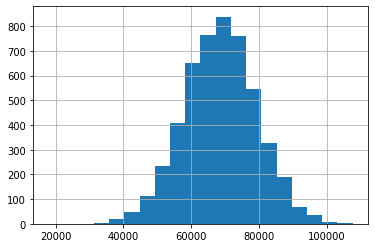

In [11]:
df['Avg. Area Income'].hist(bins=20)

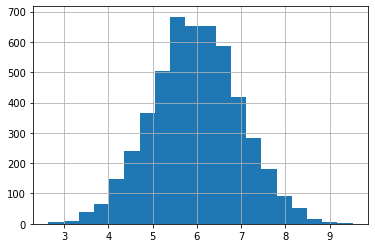

In [14]:
df['Avg. Area House Age'].hist(bins=20)

<b> Graph Plots </b>

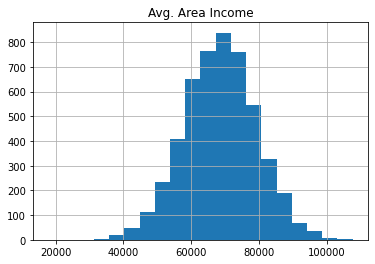

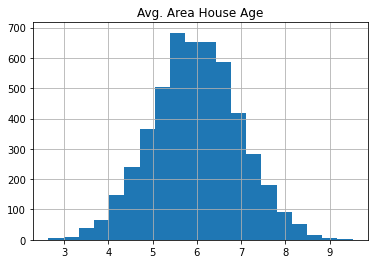

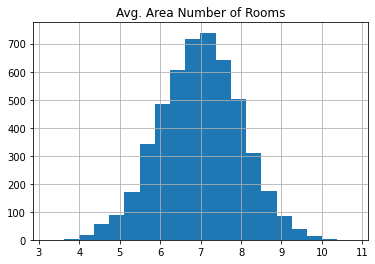

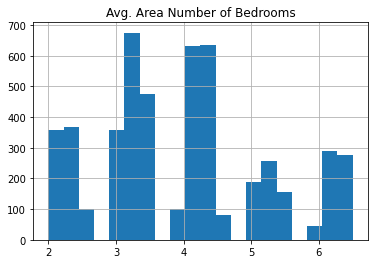

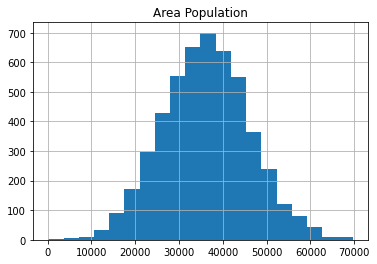

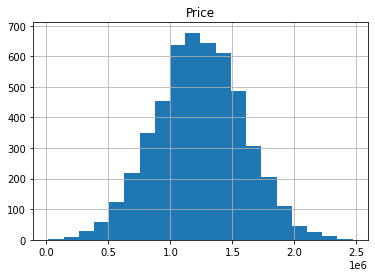

In [19]:

for i in df.columns[:-1]:
    df[i].hist(bins=20)
    plt.title(i)
    plt.show()

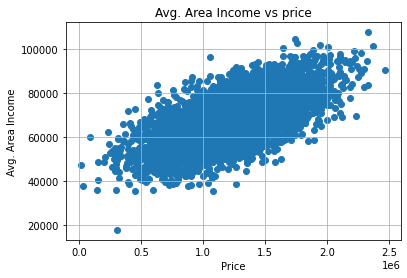

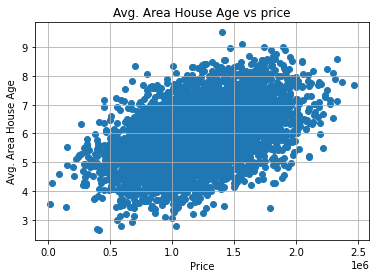

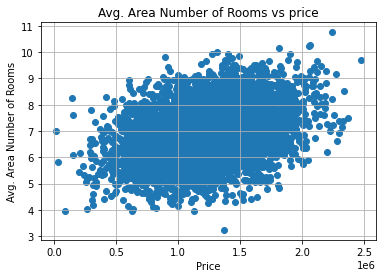

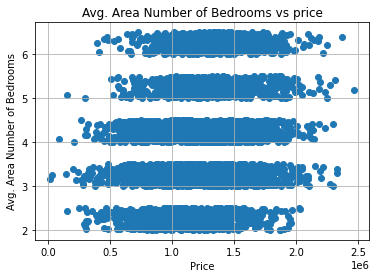

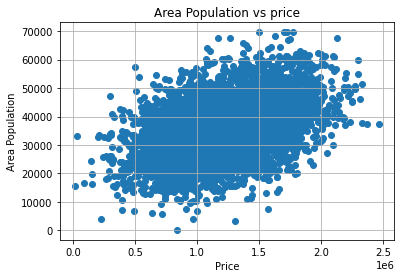

In [25]:
for i in df.columns[:-2]:
    plt.scatter(df['Price'],df[i])
    plt.xlabel('Price')
    plt.ylabel(i)
    plt.title(i + ' vs price')
    plt.grid()
    plt.show()
    


In [26]:
import seaborn as sns


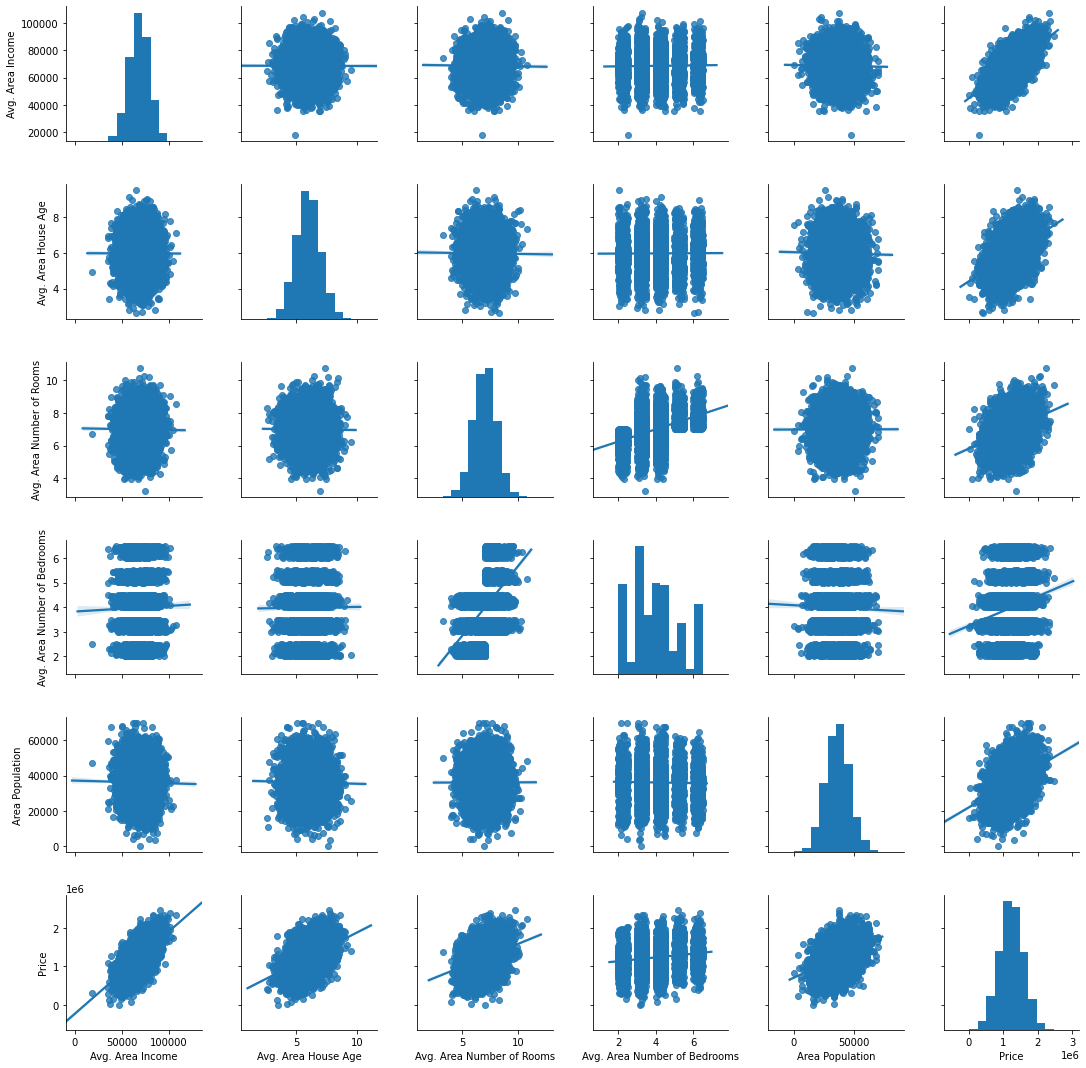

In [27]:
sns.pairplot(df,kind='reg')

In [29]:
df['Address'][0]

'208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

In [30]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [36]:
x=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
y=df['Price']

In [37]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
Avg. Area Income             5000 non-null float64
Avg. Area House Age          5000 non-null float64
Avg. Area Number of Rooms    5000 non-null float64
Area Population              5000 non-null float64
dtypes: float64(4)
memory usage: 156.3 KB


In [38]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

<b>Splitting Data </b>

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=10)

In [42]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 4875 to 1289
Data columns (total 4 columns):
Avg. Area Income             3750 non-null float64
Avg. Area House Age          3750 non-null float64
Avg. Area Number of Rooms    3750 non-null float64
Area Population              3750 non-null float64
dtypes: float64(4)
memory usage: 146.5 KB


In [43]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 245 to 1234
Data columns (total 4 columns):
Avg. Area Income             1250 non-null float64
Avg. Area House Age          1250 non-null float64
Avg. Area Number of Rooms    1250 non-null float64
Area Population              1250 non-null float64
dtypes: float64(4)
memory usage: 48.8 KB


In [44]:
ytrain.shape

(3750,)

In [45]:
ytest.shape

(1250,)

<b> Creating the machine Learning Model </b>

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model =LinearRegression()

<b> TRaining the model with Training Data </b>

In [50]:
model.fit(xtrain,ytrain)

LinearRegression()

In [52]:
pd.DataFrame(model.coef_,columns=['Coef.'],index=x.columns)

,Coef.
Avg. Area Income,21.591947
Avg. Area House Age,165128.317665
Avg. Area Number of Rooms,120463.708087
Area Population,15.336828


<b> Evalution</b>

In [55]:
print('%.1f%%'%(model.score(xtest,ytest)*100))

91.8%


In [57]:
ypred=model.predict(xtest)

In [58]:
ypred

array([1193899.36335096, 1187262.43784591, 1046347.43872966, ...,
        769979.21424061, 1588323.12890354, 1732539.85447395])

In [59]:
ytest

245     1.118048e+06
4493    1.326947e+06
4583    1.053485e+06
2242    7.590447e+05
3407    1.381118e+06
807     7.048842e+05
693     2.332111e+06
515     1.548323e+06
3224    1.453109e+06
549     1.113571e+06
4846    1.301936e+06
3863    1.641474e+06
29      1.577018e+06
3960    5.698768e+05
1444    1.297619e+06
4313    8.674447e+05
484     1.012322e+06
3235    1.200061e+06
1175    1.188417e+06
274     9.948977e+05
4383    8.684353e+05
3546    1.166336e+06
4626    1.312637e+06
1122    1.073350e+06
1589    1.153135e+06
2133    1.603268e+06
4182    3.955232e+05
3751    1.324378e+06
2636    1.449409e+06
1961    1.557794e+06
            ...     
3778    1.761961e+06
287     1.592768e+06
1674    1.193107e+06
531     9.112022e+05
734     1.039915e+06
2026    1.556552e+06
1364    1.706690e+06
313     1.420284e+06
3777    1.205114e+06
4498    9.074625e+05
1266    1.555491e+06
1429    1.011141e+06
455     9.247285e+05
771     1.540870e+06
4890    1.405496e+06
3820    1.101239e+06
3469    1.184

In [60]:
from sklearn.metrics import mean_absolute_error

In [64]:
print(100*(mean_absolute_error(ytest,ypred)/ypred[0]))

6.761710168832004


In [62]:
ypred[0]

1193899.3633509637

In [66]:
# accuracy=1-error
# error =1-accuracy 

<b> conclusion: Lets use this model,because the accuracy score is more than 90 % </b>

<b> Deployment </b>

In [67]:
final_model=model

In [68]:
pd.to_pickle(final_model,'HousePricePredictor')